In [3]:
# データ前処理
#IPごとに、閲覧したものをリストにして、興味の移り変わりをモデル化

import csv
import pandas as pd

# CSVファイルのパス
csv_file_path = './data/access.csv'

# CSVファイルを読み込む
df = pd.read_csv(csv_file_path)

# DataFrameを表示する
print(df.head(5))

from urllib.parse import urlparse
# urlに指定された文字列を含んでいるかどうか判定する関数
def filter_str(str1:str):
    try:
        str1=str1.lower()
        if (not ('zanbil.ir' in str1)) and (not ('znbl.ir' in str1))and (not ('zanbil-ir' in str1)):
            return str1
        else:
            return '-'
    except Exception as e:
        return '-'
# URLからドメイン名を抽出する関数
def get_domain(url):
    try:
        domain = urlparse(url).netloc
        return domain
    except Exception as e:
        return None
# リファラが空白でないデータをフィルタリング
df_filtered = df[df['Referer'] != '-']
# ドメインがzanbil.irのものだけをフィルタリング
df_filtered['Referer_not_Zanbil']=df_filtered[df_filtered['Referer'].apply(filter_str)!='-']['Referer']
# df_filtered['Referer_Zanbil'] = df_filtered['www.zanbil.ir' in df_filtered['Referer'] is str ]
# リファラからドメイン名を抽出
df_filtered['Referer_Domain'] = df_filtered['Referer_not_Zanbil'].apply(get_domain)


# リファラの頻度を計算
#value_countsメソッドは、デフォルトで出現頻度の降順（最も頻繁に出現する値から最も少なく出現する値まで）でソートされたシリーズを返します
referer_counts = df_filtered['Referer'].value_counts()
referer_not_zanbil_counts = df_filtered['Referer_not_Zanbil'].value_counts()
referer_domain_counts=df_filtered['Referer_Domain'].value_counts()
print(len(referer_counts))
print(len(referer_not_zanbil_counts))
print(len(referer_domain_counts))

              IP                    DateTime  \
0   54.36.149.41  22/Jan/2019:03:56:14 +0330   
1    31.56.96.51  22/Jan/2019:03:56:16 +0330   
2    31.56.96.51  22/Jan/2019:03:56:16 +0330   
3  40.77.167.129  22/Jan/2019:03:56:17 +0330   
4    91.99.72.15  22/Jan/2019:03:56:17 +0330   

                                             Request  Status  Bytes  \
0  GET /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%D...     200  30577   
1     GET /image/60844/productModel/200x200 HTTP/1.1     200   5667   
2     GET /image/61474/productModel/200x200 HTTP/1.1     200   5379   
3     GET /image/14925/productModel/100x100 HTTP/1.1     200   1696   
4  GET /product/31893/62100/%D8%B3%D8%B4%D9%88%D8...     200  41483   

                               Referer  \
0                                    -   
1  https://www.zanbil.ir/m/filter/b113   
2  https://www.zanbil.ir/m/filter/b113   
3                                    -   
4                                    -   

                               

C:\Users\spyk4\AppData\Local\Temp\ipykernel_13636\2009493985.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Referer_not_Zanbil']=df_filtered[df_filtered['Referer'].apply(filter_str)!='-']['Referer']
C:\Users\spyk4\AppData\Local\Temp\ipykernel_13636\2009493985.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Referer_Domain'] = df_filtered['Referer_not_Zanbil'].apply(get_domain)


103236
25849
358


Request
GET /m/browse/refrigerator-and-freezer/%DB%8C%D8%AE%DA%86%D8%A7%D9%84-%D9%81%D8%B1%DB%8C%D8%B2%D8%B1 HTTP/1.1                                             4381
GET /m/browse/home-appliances/%D9%84%D9%88%D8%A7%D8%B2%D9%85-%D8%AE%D8%A7%D9%86%DA%AF%DB%8C HTTP/1.1                                                      4093
GET /m/browse/cell-phone/%DA%AF%D9%88%D8%B4%DB%8C-%D9%85%D9%88%D8%A8%D8%A7%DB%8C%D9%84 HTTP/1.1                                                           3766
GET /m/browse/tv/%D8%AA%D9%84%D9%88%DB%8C%D8%B2%DB%8C%D9%88%D9%86 HTTP/1.1                                                                                3320
GET /browse/home-appliances/%D9%84%D9%88%D8%A7%D8%B2%D9%85-%D8%AE%D8%A7%D9%86%DA%AF%DB%8C HTTP/1.1                                                        2891
GET /m/browse/washing-machine/%D9%85%D8%A7%D8%B4%DB%8C%D9%86-%D9%84%D8%A8%D8%A7%D8%B3%D8%B4%D9%88%DB%8C%DB%8C HTTP/1.1                                    2539
GET /m/browse/big-kitchen-appliances/%

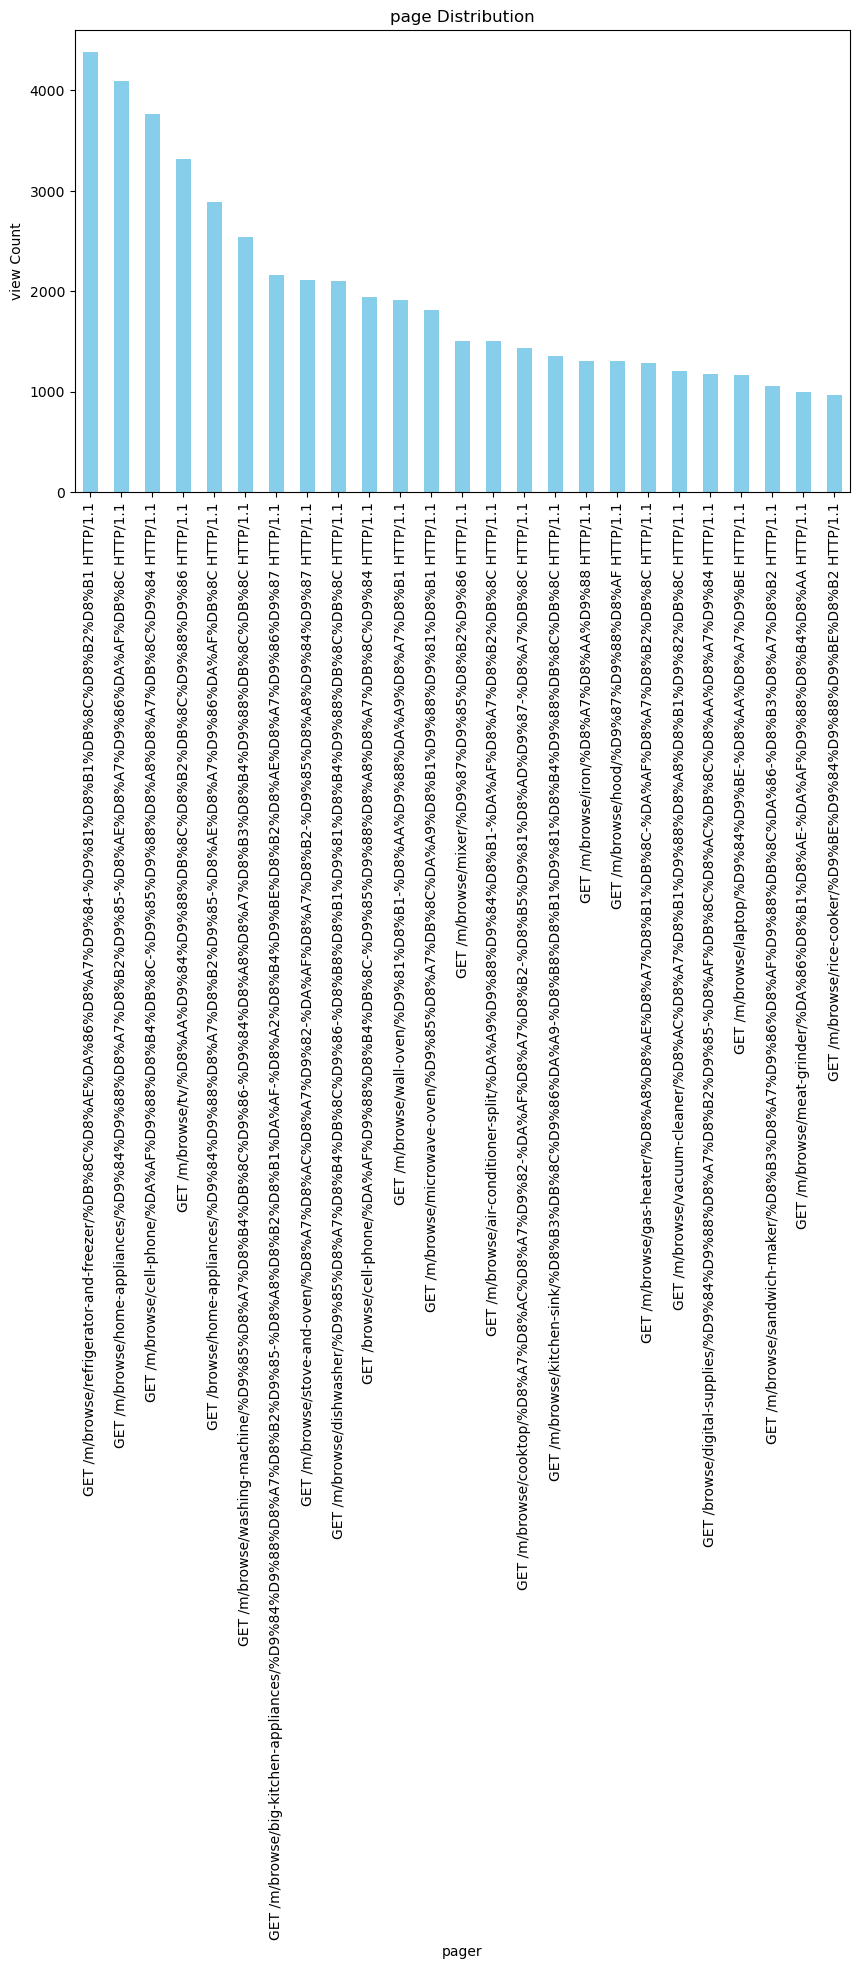

30/25849
Referer_not_Zanbil
https://www.google.com/search?q=%D8%AA%D8%B4%DA%A9+%D8%A8%D8%B1%D9%82%DB%8C+%D8%A7%D9%85%D8%B3%DB%8C%DA%AF&oq=%D8%AA%D8%B4%DA%A9+%D8%A8%D8%B1%D9%82%DB%8C+%D8%A7%D9%85%D8%B3%DB%8C%DA%AF&gs_l=mobile-heirloom-serp.12...0.0.1.806.0.0.0.0.0.0.0.0..0.0....0...1c..34.mobile-heirloom-serp..5.10.1529.l-8ZnVCwe5U                                                                                                                                                                                                                                                                                                                  A
https://www.google.com/search?q=%D8%AF%D8%B3%D8%AA%DA%AF%D8%A7%D9%87+%D9%86%D8%A8%D9%88%D9%84%D8%A7%DB%8C%D8%B2%D8%B1&ie=utf-8&oe=utf-8                                                                                                                                                                                                                                 

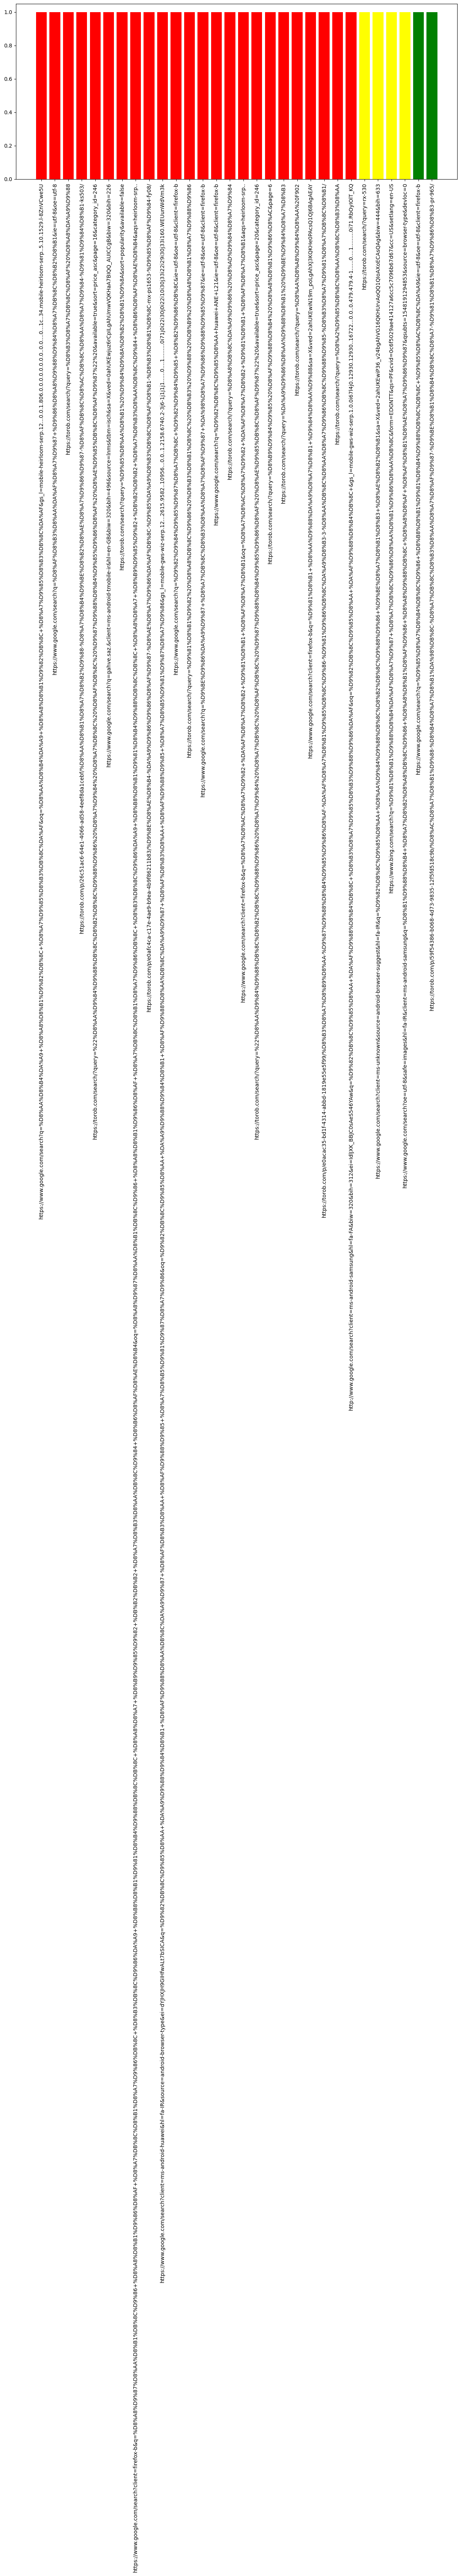

30/358
Referer_Domain
torob.com                                  A
www.google.com                             B
emalls.ir                                  B
api.torob.com                              B
ptcnovin.com                               B
com.google.android.googlequicksearchbox    B
www.garda.ir                               C
www.samsungcenter.ir                       C
www.angabin.ir                             C
irantradeco.ir                             C
matching.torob.com                         C
www.khanesazan.com                         C
www.bing.com                               C
www.mobile.ir                              C
www.ask.ir                                 C
www.ptcnovin.com                           C
www.asire20.ir                             C
www.mojazsima.ir                           C
www-isna-ir.cdn.ampproject.org             C
bpm.shaparak.ir                            C
gahar.ir                                   C
homepars.com                     

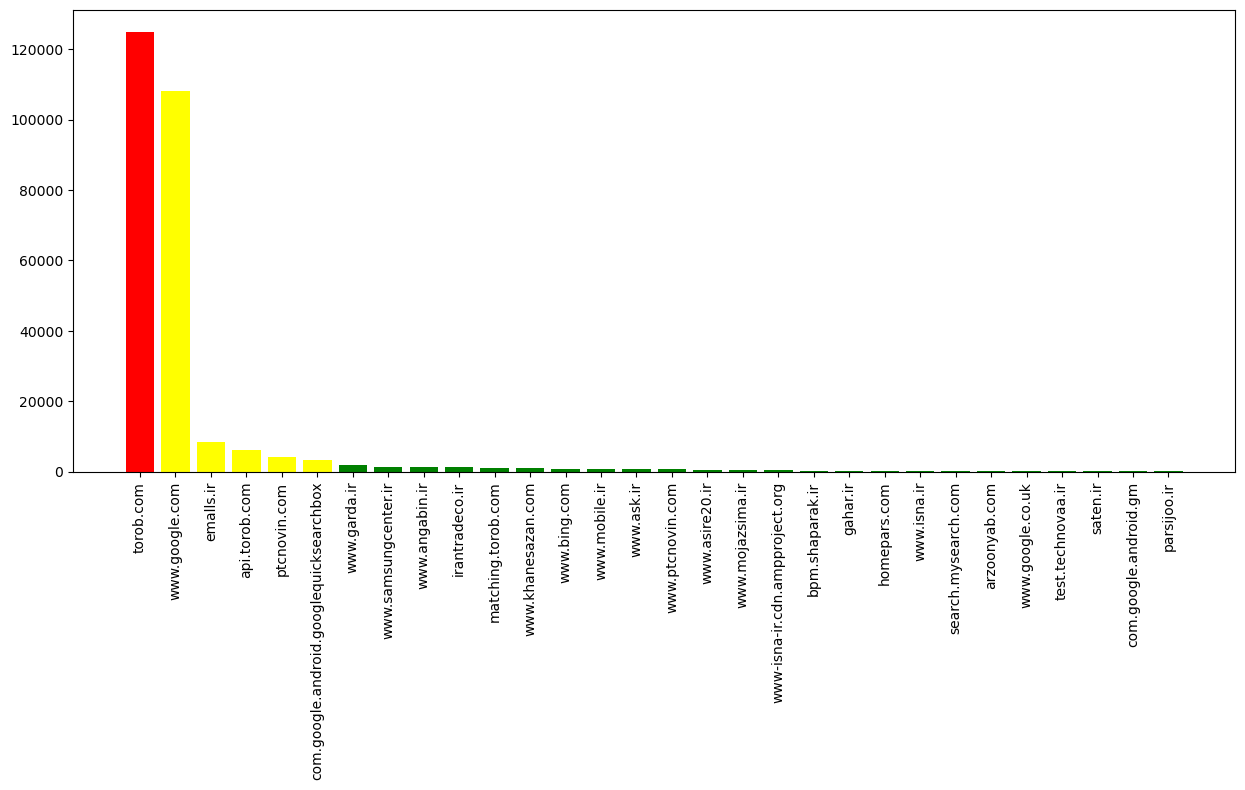

UserAgent
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36                                                                                        746572
Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36                                                                                         702672
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36                                                                                                     636897
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0                                                                                                                            552142
Mozilla/5.0 (Windows NT 6.1; rv:64.0) Gecko/20100101 Firefox/64.0                                                                                         

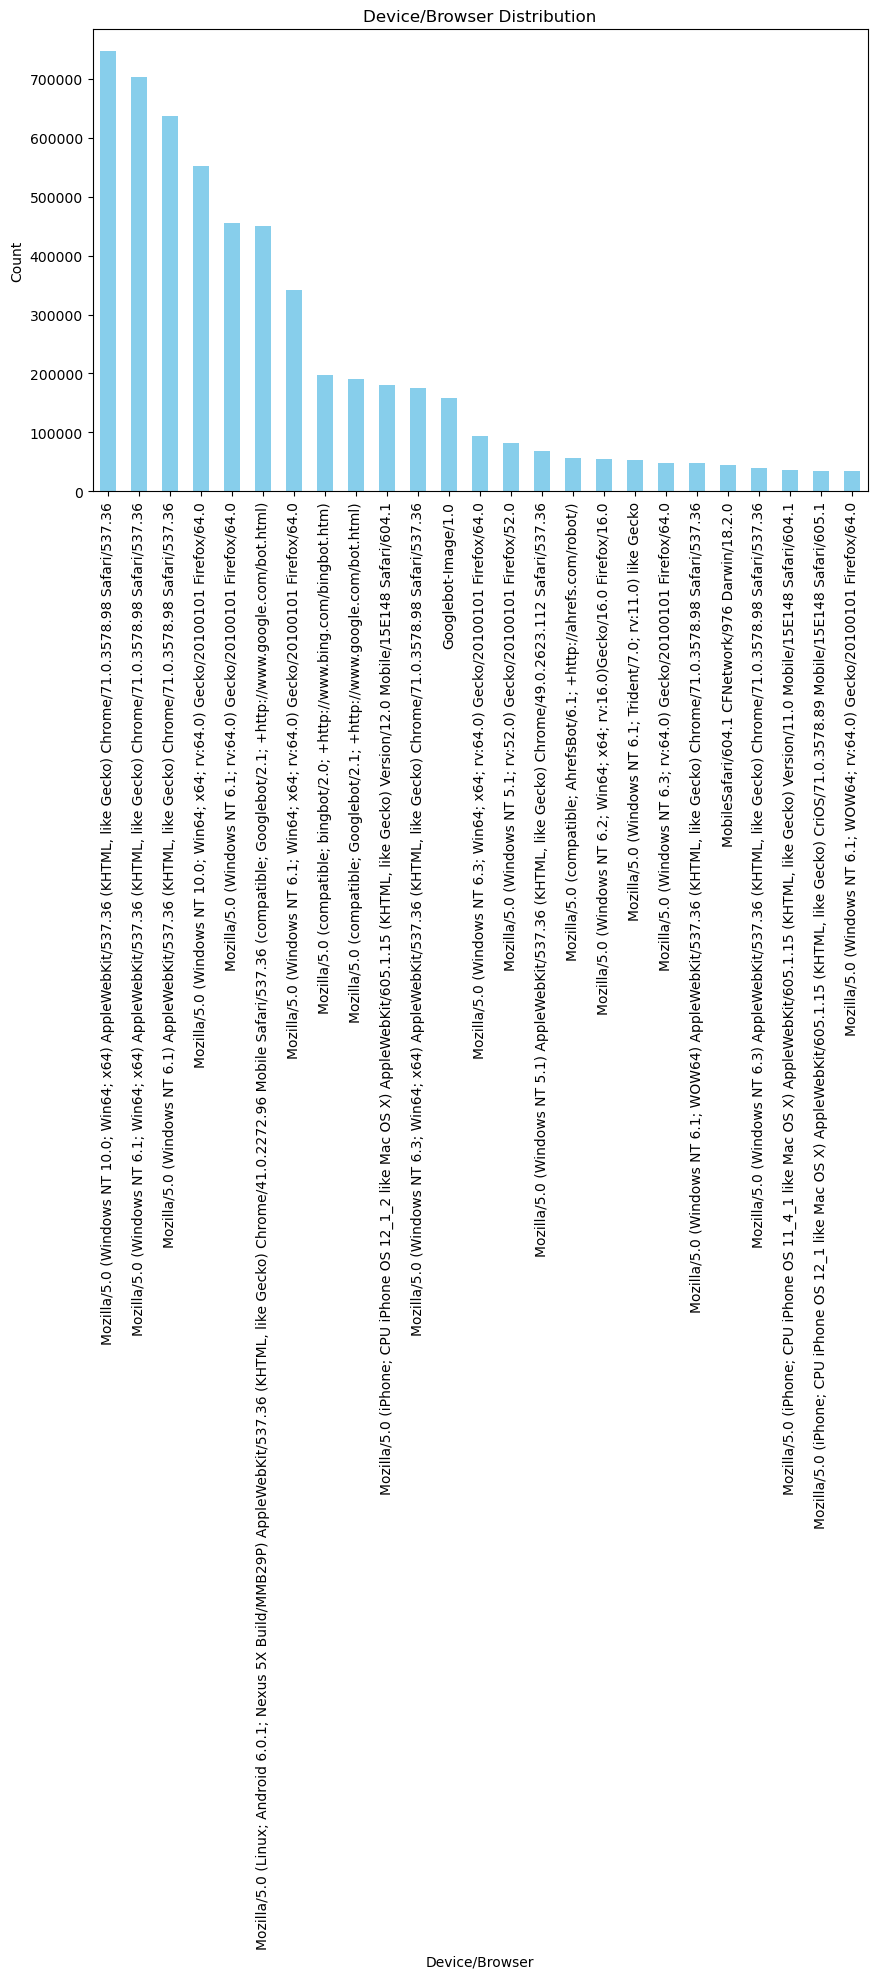

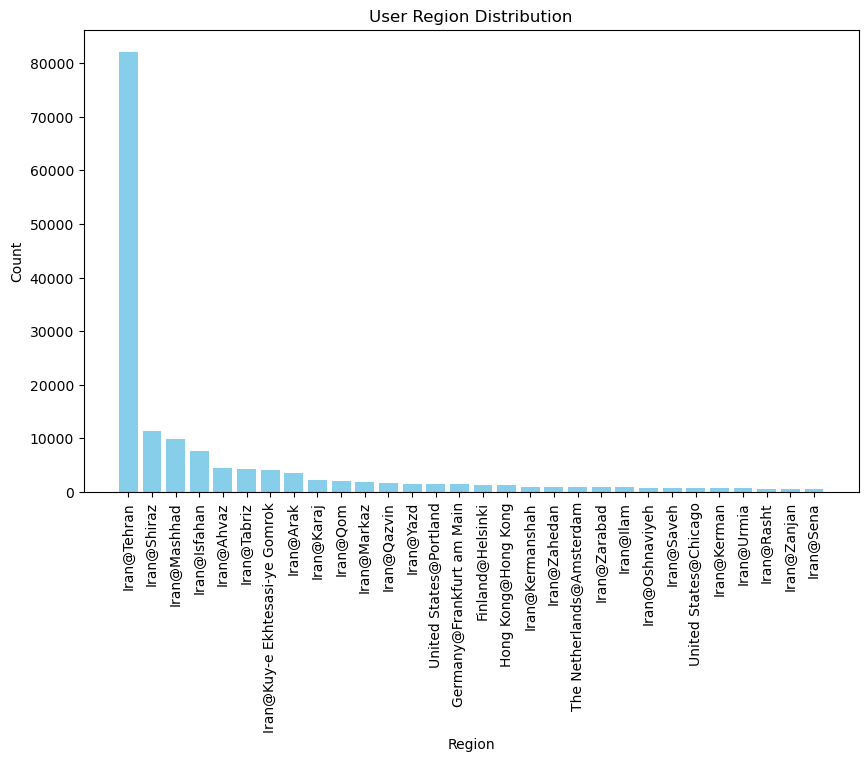

"def get_duration(record):\n    recordTime = conv_dt_to_milli(record['DateTime'])\n    recentry_DateTime = None\n    same_to_referers = df_zanbil_referrer[df_zanbil_referrer['Request'].str.contains(record['Referer'])]\n    for same_to_referer in same_to_referers.itertuples():\n        same_to_referer_milli = conv_dt_to_milli(same_to_referer.DateTime)\n        if recordTime > same_to_referer_milli and (recentry_DateTime == None or recentry_DateTime < same_to_referer_milli):\n            recentry_DateTime = same_to_referer_milli\n    if recentry_DateTime == None:\n        return 0\n    else:\n        return recordTime - recentry_DateTime\n# IPごとにリファラがzanbil.irだった場合のページごとの滞在時間を計算\npage_stay_time = df_zanbil_referrer.apply(get_duration, axis=1)\npage_stay_time = page_stay_time[page_stay_time != 0]\npage_stay_time = page_stay_time.mean()\nprint(page_stay_time)"

In [5]:
#ページビューランキング
import matplotlib.pyplot as plt
filtered_page_view_ranking = df[df['Request'].str.contains('/browse')==True]['Request'].value_counts()
print(filtered_page_view_ranking.head(25))
# プロットを作成
plt.figure(figsize=(10, 6))
filtered_page_view_ranking.head(25).plot(kind='bar', color='skyblue')
plt.title('page Distribution')
plt.xlabel('pager')
plt.ylabel('view Count')
plt.show()
#平均滞在時間
from datetime import datetime

def conv_dt_to_milli(date_str):
    date_obj = datetime.strptime(date_str, '%d/%b/%Y:%H:%M:%S %z')
    timestamp = date_obj.timestamp()
    milliseconds = timestamp * 1000
    return milliseconds
df_zanbil_referrer = df[df['Referer'].str.contains('www.zanbil.ir', na=False)]

#流入経路
import pandas as pd
import matplotlib.pyplot as plt
import os
# マジックコマンド
%matplotlib inline
filter_size=30
print(str(filter_size)+"/"+str(len(referer_not_zanbil_counts)))
referer_counts_top30=referer_not_zanbil_counts.tail(30)
# 頻度の累積比率を計算
cumulative_ratio = referer_counts_top30.cumsum() / referer_counts_top30.sum()

# ABC分析の閾値を設定
A_threshold = 0.8
B_threshold = 0.95

# ABCカテゴリを割り当て
categories = pd.cut(cumulative_ratio, bins=[0, A_threshold, B_threshold, 1], labels=['A', 'B', 'C'])

# 結果を表示
print(categories.tail(30))

# プロットを作成
plt.figure(figsize=(15, 6))
plt.bar(referer_counts_top30.index, referer_counts_top30.values, color=categories.map({'A': 'red', 'B': 'yellow', 'C': 'green'})) # type: ignore
plt.xticks(rotation=90)
images_directory = './images/'
try:   
    os.makedirs(images_directory)
except:
    pass
plt.savefig('./images/ABC.png')
plt.show()
#流入経路ドメイン
import pandas as pd
import matplotlib.pyplot as plt
import os
# マジックコマンド
%matplotlib inline
filter_size=30
print(str(filter_size)+"/"+str(len(referer_domain_counts)))
referer_counts_top30=referer_domain_counts.head(30)
# 頻度の累積比率を計算
cumulative_ratio = referer_counts_top30.cumsum() / referer_counts_top30.sum()

# ABC分析の閾値を設定
A_threshold = 0.8
B_threshold = 0.95

# ABCカテゴリを割り当て
categories = pd.cut(cumulative_ratio, bins=[0, A_threshold, B_threshold, 1], labels=['A', 'B', 'C'])

# 結果を表示
print(categories.head(30))

# プロットを作成
plt.figure(figsize=(15, 6))
plt.bar(referer_counts_top30.index, referer_counts_top30.values, color=categories.map({'A': 'red', 'B': 'yellow', 'C': 'green'})) # type: ignore
plt.xticks(rotation=90)
images_directory = './images/'
try:   
    os.makedirs(images_directory)
except:
    pass
plt.savefig('./images/ABC_domain.png')
plt.show()
import matplotlib.pyplot as plt
# デバイスやブラウザの分布データを取得
device_distribution = df['UserAgent'].value_counts()

print(device_distribution[:25])
# プロットを作成
plt.figure(figsize=(10, 6))
device_distribution.head(25).plot(kind='bar', color='skyblue')
plt.title('Device/Browser Distribution')
plt.xlabel('Device/Browser')
plt.ylabel('Count')
plt.show()
from itertools import islice
import geoip2.database
import numpy as np
reader = geoip2.database.Reader('data/GeoLite2-City.mmdb')
# ユニークなIPアドレスの地域を特定する
unique_ips = df['IP'].unique()
array=[]
for ip in unique_ips:
    try:
        city=reader.city(ip)
        array.append(city.country.name +'@'+city.city.name)
    except Exception as e:
        pass
region_counts = {}
for region in array:
    if region in region_counts:
        region_counts[region] += 1
    else:
        region_counts[region] = 1

sorted_regions = dict(sorted(region_counts.items(), key=lambda item: item[1], reverse=True)[:30])
# プロットを作成
plt.figure(figsize=(10, 6))
plt.bar(sorted_regions.keys(), sorted_regions.values(), color='skyblue')
plt.title('User Region Distribution')
plt.xlabel('Region')
plt.xticks(rotation=90) 
plt.ylabel('Count')
plt.show()
'''def get_duration(record):
    recordTime = conv_dt_to_milli(record['DateTime'])
    recentry_DateTime = None
    same_to_referers = df_zanbil_referrer[df_zanbil_referrer['Request'].str.contains(record['Referer'])]
    for same_to_referer in same_to_referers.itertuples():
        same_to_referer_milli = conv_dt_to_milli(same_to_referer.DateTime)
        if recordTime > same_to_referer_milli and (recentry_DateTime == None or recentry_DateTime < same_to_referer_milli):
            recentry_DateTime = same_to_referer_milli
    if recentry_DateTime == None:
        return 0
    else:
        return recordTime - recentry_DateTime
# IPごとにリファラがzanbil.irだった場合のページごとの滞在時間を計算
page_stay_time = df_zanbil_referrer.apply(get_duration, axis=1)
page_stay_time = page_stay_time[page_stay_time != 0]
page_stay_time = page_stay_time.mean()
print(page_stay_time)'''